diante dessa imensa quantidade de dados, visualizar eles é um dos principais objetivos

# Ideias de representacoes graficas e tabelas sobre os dados

- tabela com as regioes do brasil, de acordo com a bilheteria total de essas regioes, para comparar quais as regies que mais assistiram filmes em 2023
- Uma serie temporal com a quantidade de bilheteria total por dia, permite ter uma visao geral de como varia a compra de bilheteria ao longo do ano, marcando o dia de maior bilheteria de cada mes FEITO
- Historiagrama da bilheteria total mensal
- Tabela com o ranking dos 10 filmes com mais bilheteria em 2023 FEITO
- Tabela com o ranring dos 10 filmes com menos bilheteria em 2023 FEITO

# Funcoes basicas para carregar os dados

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
def carrega_tabela(database, tabela):
    '''
    Carrega uma tabela de um banco de dados 
    SQLite em um DataFrame do Pandas.
    Parâmetros:
    database: str - Caminho para o arquivo do banco de dados SQLite.
    tabela: str - Nome da tabela a ser carregada.
    '''
    with sqlite3.connect(database) as conn:
        query = f"SELECT * FROM {tabela}"
        df = pd.read_sql_query(query, conn)
    return df

In [3]:
def lista_tabelas(db_filename):
    '''
    Lista todas as tabelas em um banco de dados SQLite.
    Parâmetros:
    db_filename: str - Caminho para o arquivo do banco de dados SQLite.
    Retorna:
    DataFrame com os nomes das tabelas e suas contagens de linhas.
    '''
    # Connect to the SQLite database
    # conn = sqlite3.connect(db_filename)
    with sqlite3.connect(db_filename) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        table_row_counts = []
        for table in tables:
            table_name = table[0]
            query = f"SELECT COUNT(*) FROM {table_name};"
            cursor.execute(query)
            row_count = cursor.fetchone()[0]
            table_row_counts.append({"Table": table_name, "Row_Count": row_count})

        return pd.DataFrame(table_row_counts)

# Navegando os dados

In [4]:
sessao = carrega_tabela("bilheteria.db", "sessao")
sessao


,id,filme_id,sala_id,publico,data_exibicao
0,1,253,5004897,8,01/01/2023
1,2,253,5001565,15,01/01/2023
2,3,253,5001566,14,01/01/2023
3,4,253,5003464,23,01/01/2023
4,5,253,5001137,37,01/01/2023
...,...,...,...,...,...
1748358,1748359,405,5000331,5,31/12/2023
1748359,1748360,405,5000333,11,31/12/2023
1748360,1748361,405,5003637,32,31/12/2023
1748361,1748362,157,5001209,124,31/12/2023


In [6]:
sala = carrega_tabela("bilheteria.db","sala")
sala

,id,nome,from_complexo
0,5000056,KINOPLEX IGUAÇU TOP SALA 01 - KINOEVOLUTION,2387
1,5000057,KINOPLEX IGUAÇU TOP SALA 02,2387
2,5000058,KINOPLEX IGUAÇU TOP SALA 03,2387
3,5000061,SALA KINOPLEX MADUREIRA 01,2389
4,5000062,SALA KINOPLEX MADUREIRA 02,2389
...,...,...,...
3226,5007071,MULTICINE SÃO JOSÉ 2,55466
3227,5007072,MULTICINE SÃO JOSÉ 3,55466
3228,5007073,MULTICINE SÃO JOSÉ 4,55466
3229,5007075,CINE RITZ MONLEVADE 1,55563


In [7]:
filme = carrega_tabela("bilheteria.db","filme")
filme

,id,titulo_original,titulo_br,cpb_roe,pais_origem,from_distribuidora
0,1,DURVAL DISCOS,None,B0200001000000,BRASIL,24
1,2,NOSSO LAR,None,B1001259400000,BRASIL,3
2,3,REMOÇÃO,None,B1301918400000,BRASIL,51
3,4,HOJE EU QUERO VOLTAR SOZINHO,None,B1402094700000,BRASIL,24
4,5,O HOMEM DE LAGOA SANTA,None,B1500150500000,BRASIL,40
...,...,...,...,...,...,...
510,511,NCT NATION: TO THE WORLD IN CINEMAS,NCT NATION: TO THE WORLD IN CINEMAS,E2300498800000,CORÉIA DO SUL,52
511,512,JOURNEY TO BETHLEHEM,JORNADA PARA BELEM,E2300507800000,ESTADOS UNIDOS,72
512,513,PRISCILLA,PRISCILLA,E2300508800000,ESTADOS UNIDOS,1
513,514,SEVENTEEN TOUR 'FOLLOW' TO JAPAN: LIVE VIEWING,SEVENTEEN TOUR 'FOLLOW' TO JAPAN: LIVE VIEWING,E2300549400000,CORÉIA DO SUL,28


In [8]:
complexo = carrega_tabela("bilheteria.db","complexo")
complexo

,id,municipio,UF,from_exibidor
0,438,BELO HORIZONTE,MG,437
1,895,SÃO PAULO,SP,1843
2,896,SANTO ANDRÉ,SP,1843
3,897,SÃO PAULO,SP,1843
4,898,SÃO PAULO,SP,1843
...,...,...,...,...
678,55214,VÁRZEA GRANDE,MT,2379
679,55217,VALPARAÍSO DE GOIÁS,GO,2379
680,55428,SÃO JOSÉ DOS CAMPOS,SP,15263
681,55466,SÃO JOSÉ,SC,5935


# Tabelas ranking

In [9]:
filme_bilhe = sessao.groupby("filme_id")["publico"].sum().reset_index()
filme_sessoes = sessao["filme_id"].value_counts().reset_index()
filme_nome = filme[["id","titulo_original"]].rename(columns={"id":"filme_id"})

filmes_total = pd.merge(filme_bilhe, filme_sessoes).merge(filme_nome).rename(columns={"count":"numero_sessoes","publico":"bilheteria_total"})

filmes10_com_menor_bilheteria = filmes_total.sort_values(by="bilheteria_total").head(10)
filmes10_com_maior_bilheteria = filmes_total.sort_values(by="bilheteria_total", ascending=False).head(10)

In [10]:
filmes10_com_maior_bilheteria

,filme_id,bilheteria_total,numero_sessoes,titulo_original
398,399,10238598,56364,BARBIE
323,324,6235953,64425,THE SUPER MARIO BROS. MOVIE
328,329,6132354,50614,FAST X
268,269,5631389,65808,AVATAR: THE WAY OF WATER
255,256,5358525,70676,PUSS IN BOOTS: THE LAST WISH
362,363,4211764,40509,GUARDIANS OF THE GALAXY VOL. 3
359,360,3987722,41205,THE LITTLE MERMAID
388,389,3985017,49623,ELEMENTAL
343,344,3328797,36391,SPIDER-MAN: ACROSS THE SPIDER-VERSE
454,455,2839181,36641,THE NUN 2


In [11]:
filmes10_com_menor_bilheteria

,filme_id,bilheteria_total,numero_sessoes,titulo_original
257,258,1,1,UNE FEMME DU MONDE
33,34,3,2,PEQUENOS GUERREIROS
46,47,4,2,BALA SEM NOME
222,223,5,1,THE ROUNDUP
243,244,5,2,WHITE NOISE
9,10,5,4,MIRANTE
199,200,7,1,DEMON SLAYER: MUGEN TRAIN
32,33,8,1,MIÚDA E O GUARDA-CHUVA
239,240,8,2,FOURMI
25,26,9,1,ALÉM DA LENDA - FILME


# Numero de bilheteria por dia

In [5]:
bilheteria_por_dia = sessao.groupby("data_exibicao")["publico"].sum().reset_index()

bilheteria_por_dia["data_exibicao"] = pd.to_datetime(bilheteria_por_dia["data_exibicao"], format="%d/%m/%Y")
bilheteria_por_dia = bilheteria_por_dia.sort_values(by="data_exibicao").reset_index(drop=True)
bilheteria_por_dia

,data_exibicao,publico
0,2023-01-01,129090
1,2023-01-02,441783
2,2023-01-03,399118
3,2023-01-04,442166
4,2023-01-05,335396
...,...,...
360,2023-12-27,323521
361,2023-12-28,338424
362,2023-12-29,266269
363,2023-12-30,276873


In [13]:
#MAXIMO DE CADA MES
#Janeiro 
bilheteria_por_dia.loc[bilheteria_por_dia[0:31]["publico"].idxmax()]
#Fevereiro
bilheteria_por_dia.loc[bilheteria_por_dia[32:61]["publico"].idxmax()]
#Abril 
bilheteria_por_dia.loc[bilheteria_por_dia[90:120]["publico"].idxmax()]
#Maio
bilheteria_por_dia.loc[bilheteria_por_dia[121:151]["publico"].idxmax()]
#Junho 
bilheteria_por_dia.loc[bilheteria_por_dia[151:181]["publico"].idxmax()]
#agosto
bilheteria_por_dia.loc[bilheteria_por_dia[213:243]["publico"].idxmax()]
#setembro
bilheteria_por_dia.loc[bilheteria_por_dia[243:273]["publico"].idxmax()]

data_exibicao    2023-09-30 00:00:00
publico                       683916
Name: 272, dtype: object

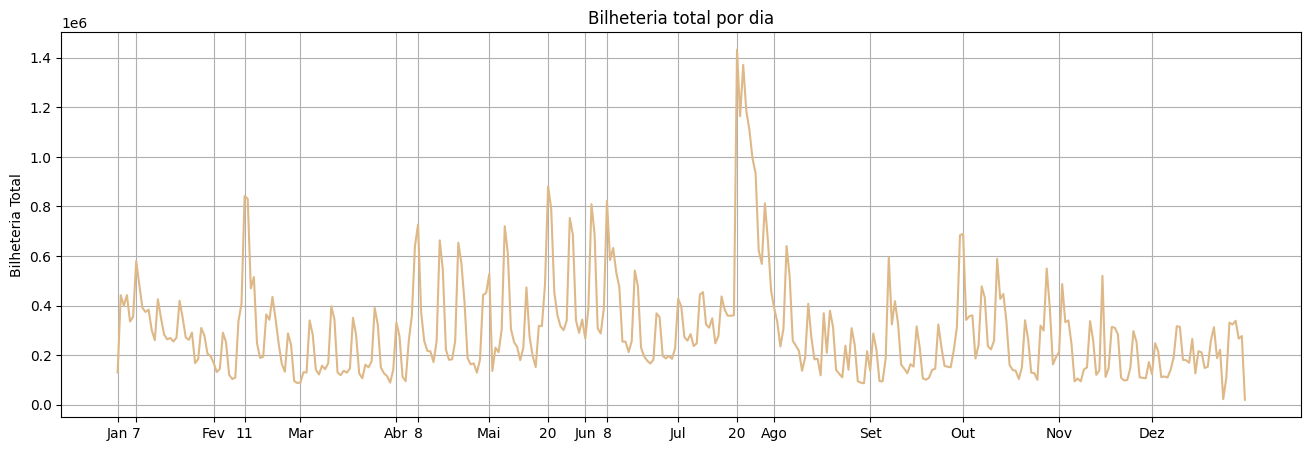

In [7]:
# datas = pd.date_range(start="2023-01-01", periods=365)
plt.figure(figsize=(16,5))
plt.plot(range(1,366),bilheteria_por_dia["publico"], color="burlywood")

dias_inicio_mes = [1, 7, 32, 42, 60, 91, 98, 121, 140, 152, 159, 182, 201, 213, 244, 274, 305, 335]
nomes_meses = ["Jan", "7", "Fev", "11", "Mar", "Abr","8", "Mai", "20", "Jun", "8", "Jul","20", "Ago", "Set", "Out","Nov", "Dez"]

plt.xticks(ticks=dias_inicio_mes, labels=nomes_meses)
plt.grid()

plt.title("Bilheteria total por dia")
plt.ylabel("Bilheteria Total")
plt.show()

#20 de julho se estreiou Barbie
#01 de junho se estreiou Spiderman Acros spider verse
#05 de Abril tinha saido Super Mario Bros o Filme
#o dia 10 e 11 de fevereiro que foram os dias pico, os filmes mais assistidos foram Gato de Botas 2, Megan e Avatar
#Que ja tinham sido estreiados faz um mes mais ou menos, mas parece que com o inicio do ano as pessoas demoraram ate
# colocarse em dias



In [15]:
sessao[sessao["data_exibicao"] == "10/02/2023"].groupby("filme_id")["publico"].sum().sort_values()
filme[filme["id"] == 256]
filme[filme["id"] == 261]
filme[filme["id"] == 269]

,id,titulo_original,titulo_br,cpb_roe,pais_origem,from_distribuidora
268,269,AVATAR: THE WAY OF WATER,AVATAR: O CAMINHO DA ÁGUA,E2200431200000,ESTADOS UNIDOS,3


# Numero de sessoes por dia

In [32]:
#quantidade de sessoes por dia
sessoes_dia = sessao.groupby("data_exibicao").size().reset_index()
sessoes_dia["data_exibicao"] = pd.to_datetime(sessoes_dia["data_exibicao"], format="%d/%m/%Y")
sessoes_dia = sessoes_dia.sort_values(by="data_exibicao")
sessoes_dia[0]

0      3119
12     4255
24     4301
36     4298
48     4478
       ... 
323    4021
335    4280
346    4198
357    4224
364    1365
Name: 0, Length: 365, dtype: int64

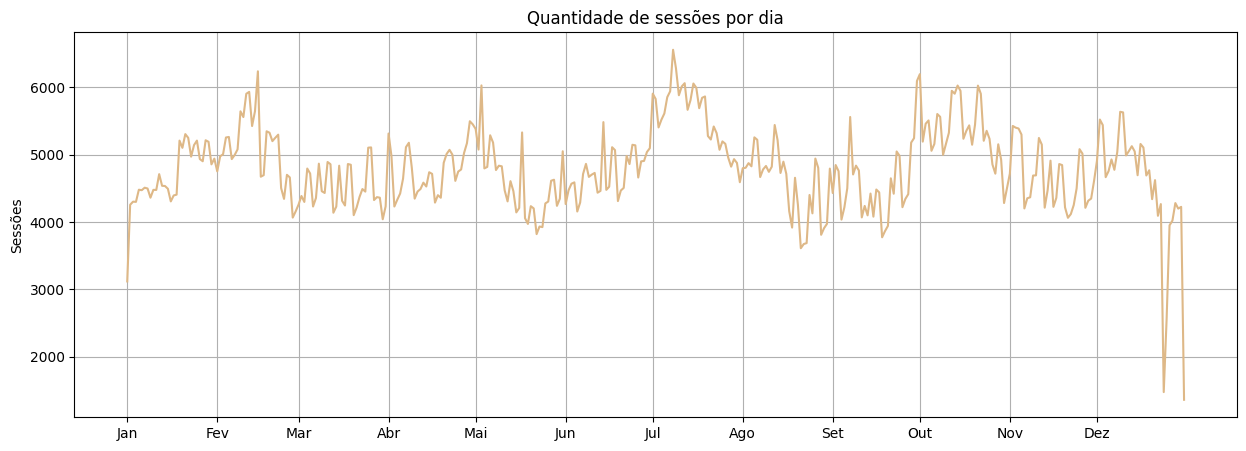

In [34]:
plt.figure(figsize=(15,5))
plt.plot(range(1,366),sessoes_dia[0], color="burlywood")

dias_inicio_mes = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
nomes_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out","Nov", "Dez"]

plt.xticks(ticks=dias_inicio_mes, labels=nomes_meses)
plt.grid()

plt.title("Quantidade de sessões por dia")
plt.ylabel("Sessões")
plt.show()

# Numero de bilheteria por mes

In [16]:
bilheteria_por_dia = sessao.groupby("data_exibicao")["publico"].sum().reset_index()

# Converter para datetime
bilheteria_por_dia["data_exibicao"] = pd.to_datetime(
    bilheteria_por_dia["data_exibicao"], format="%d/%m/%Y"
)

# Ordenar
bilheteria_por_dia = bilheteria_por_dia.sort_values(by="data_exibicao").reset_index(drop=True)

# Agrupar por mês (como Period)
bilheteria_por_dia["mes"] = bilheteria_por_dia["data_exibicao"].dt.to_period("M")

# Agrupar e renomear
bilheteria_por_mes = bilheteria_por_dia.groupby("mes")["publico"].sum().reset_index()

bilheteria_por_mes


,mes,publico
0,2023-01,9922607
1,2023-02,8087999
2,2023-03,5781219
3,2023-04,9694592
4,2023-05,12008632
5,2023-06,10838998
6,2023-07,17739155
7,2023-08,7682475
8,2023-09,6807769
9,2023-10,9158840


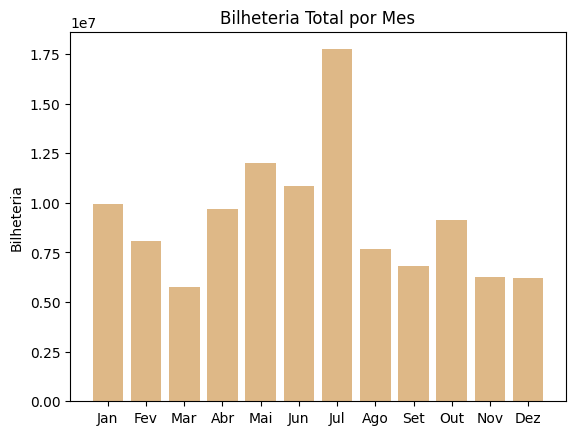

In [17]:
dias_da_semana = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out","Nov", "Dez"]

plt.bar(dias_da_semana, bilheteria_por_mes["publico"], color="burlywood")
plt.title("Bilheteria Total por Mes") #os demais metodos funcionam do mesmo jeito
plt.ylabel("Bilheteria")
plt.show()

# Vida dos filmes nos cinemas

In [18]:
dias_totais = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

def filme_por_dia(id_do_filme):
    data_frame = sessao[sessao["filme_id"]== id_do_filme].copy()
    data_frame["data_exibicao"] = pd.to_datetime(
        data_frame["data_exibicao"],
        format="%d/%m/%Y"
        )
    data_frame = data_frame.groupby("data_exibicao")["publico"].sum()
    data_frame = data_frame[data_frame >= data_frame.max()/20]
    data_frame = data_frame.reindex(dias_totais)
    return data_frame

filme_por_dia(399)

2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
              ..
2023-12-27   NaN
2023-12-28   NaN
2023-12-29   NaN
2023-12-30   NaN
2023-12-31   NaN
Freq: D, Name: publico, Length: 365, dtype: float64

In [19]:
#Metricas
medias = []
for filmes in filmes10_com_maior_bilheteria["filme_id"]:
    medias.append(int(filme_por_dia(filmes).count()))

medias.sort()
medias


[23, 28, 30, 34, 43, 45, 47, 49, 60, 64]

In [20]:
filmes10_com_maior_bilheteria[["filme_id","titulo_original"]]

,filme_id,titulo_original
398,399,BARBIE
323,324,THE SUPER MARIO BROS. MOVIE
328,329,FAST X
268,269,AVATAR: THE WAY OF WATER
255,256,PUSS IN BOOTS: THE LAST WISH
362,363,GUARDIANS OF THE GALAXY VOL. 3
359,360,THE LITTLE MERMAID
388,389,ELEMENTAL
343,344,SPIDER-MAN: ACROSS THE SPIDER-VERSE
454,455,THE NUN 2


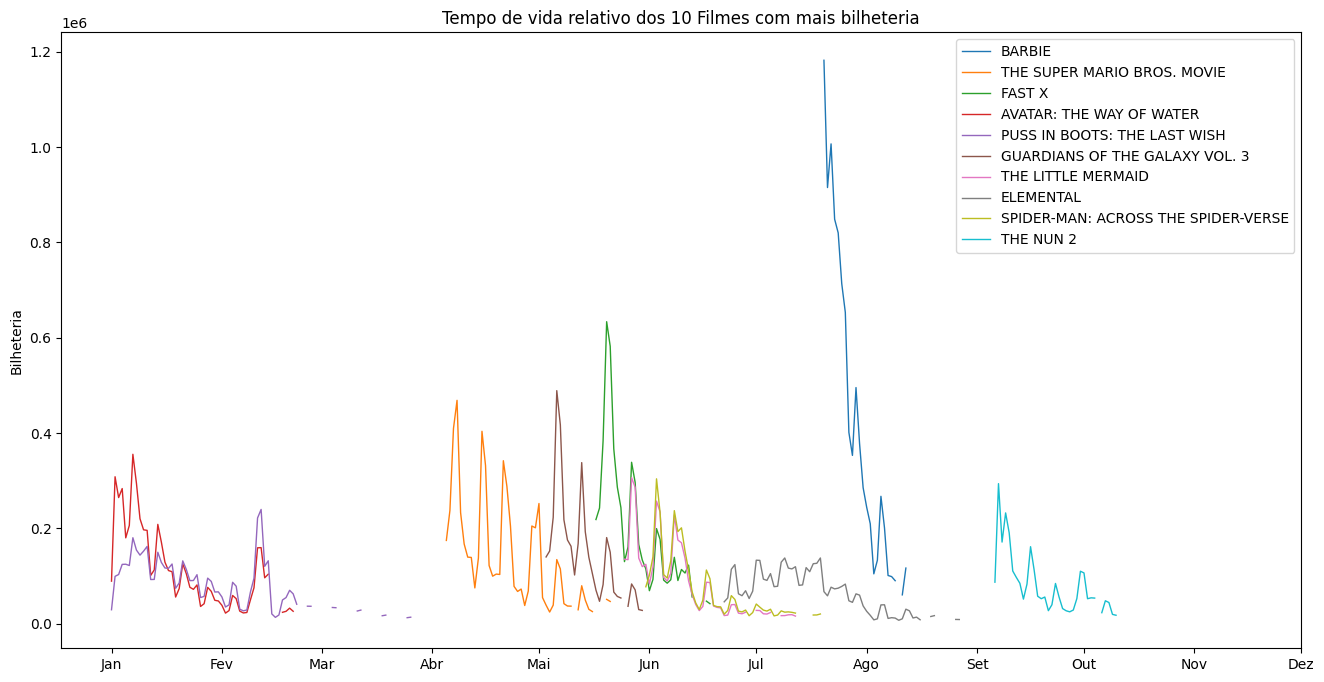

In [21]:
plt.figure(figsize=(16,8))
r = range(1,366)
for filmes,nome in filmes10_com_maior_bilheteria[["filme_id","titulo_original"]].values:
    plt.plot(r, filme_por_dia(filmes),label=nome,linewidth=1)

plt.legend()
dias_inicio_mes = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
nomes_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out","Nov", "Dez"]

plt.title("Tempo de vida relativo dos 10 Filmes com mais bilheteria")
plt.ylabel("Bilheteria")
plt.xticks(ticks=dias_inicio_mes, labels=nomes_meses)
plt.show()

In [22]:
sessao = carrega_tabela("bilheteria.db", "sessao")
total_bilheteria_dataframe = sessao.publico
total_bilheteria_dataframe.describe()


count    1.748363e+06
mean     6.300355e+01
std      9.562188e+01
min      1.000000e+00
25%      1.100000e+01
50%      3.000000e+01
75%      7.500000e+01
max      3.501000e+03
Name: publico, dtype: float64

# Qual do dia da semana com mais visitas ao cinema ?

In [23]:
sessao = carrega_tabela("bilheteria.db","sessao")

In [24]:
sessao

,id,filme_id,sala_id,publico,data_exibicao
0,1,253,5004897,8,01/01/2023
1,2,253,5001565,15,01/01/2023
2,3,253,5001566,14,01/01/2023
3,4,253,5003464,23,01/01/2023
4,5,253,5001137,37,01/01/2023
...,...,...,...,...,...
1748358,1748359,405,5000331,5,31/12/2023
1748359,1748360,405,5000333,11,31/12/2023
1748360,1748361,405,5003637,32,31/12/2023
1748361,1748362,157,5001209,124,31/12/2023


In [25]:
dias_ano_dataframe = sessao.groupby("data_exibicao")["publico"].sum().reset_index()
dias_ano_dataframe["data_exibicao"] = pd.to_datetime(dias_ano_dataframe["data_exibicao"], format="%d/%m/%Y")

dias_ano_dataframe = dias_ano_dataframe.sort_values(by="data_exibicao").reset_index(drop=True)
dias_ano_dataframe["dias_da_semana"] = dias_ano_dataframe["data_exibicao"].dt.day_name(locale="pt_BR")
bilheteria_por_dia_da_semana = dias_ano_dataframe.groupby("dias_da_semana")["publico"].sum().reset_index()
bilheteria_por_dia_da_semana.sort_values(by="dias_da_semana")

ordem_correta = [
    "Segunda feira", "Terça feira", "Quarta feira",
    "Quinta feira", "Sexta feira", "Sábado", "Domingo"
]

# Transformar a coluna em categórica com ordem personalizada
bilheteria_por_dia_da_semana['dias_da_semana'] = pd.Categorical(
    bilheteria_por_dia_da_semana['dias_da_semana'],
    categories=ordem_correta,
    ordered=True
    )

# Ordenar
bilheteria_por_dia_da_semana = bilheteria_por_dia_da_semana.sort_values('dias_da_semana')
bilheteria_por_dia_da_semana



,dias_da_semana,publico
5,Sábado,24541051
0,Domingo,20355452
1,NaN,12196203
2,NaN,14209315
3,NaN,12967483
4,NaN,14387832
6,NaN,11495747


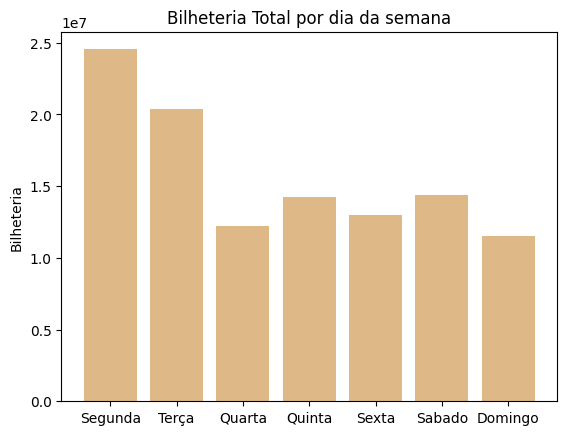

In [26]:
dias_da_semana = ["Segunda","Terça","Quarta","Quinta","Sexta","Sabado","Domingo"]

plt.bar(dias_da_semana, bilheteria_por_dia_da_semana["publico"], color="burlywood")
plt.title("Bilheteria Total por dia da semana") #os demais metodos funcionam do mesmo jeito
plt.ylabel("Bilheteria")
plt.show()

# Vida dos filmes em relacao a quantidade de sessoes

In [27]:
sessao

,id,filme_id,sala_id,publico,data_exibicao
0,1,253,5004897,8,01/01/2023
1,2,253,5001565,15,01/01/2023
2,3,253,5001566,14,01/01/2023
3,4,253,5003464,23,01/01/2023
4,5,253,5001137,37,01/01/2023
...,...,...,...,...,...
1748358,1748359,405,5000331,5,31/12/2023
1748359,1748360,405,5000333,11,31/12/2023
1748360,1748361,405,5003637,32,31/12/2023
1748361,1748362,157,5001209,124,31/12/2023


In [28]:
#quantidade de sessoes por dia por filme
sessoes_dia = sessao.groupby(["data_exibicao","filme_id"])["filme_id"].value_counts().reset_index()
sessoes_dia["data_exibicao"] = pd.to_datetime(sessoes_dia["data_exibicao"], format="%d/%m/%Y")

sessoes_dia = sessoes_dia.sort_values(by="data_exibicao").reset_index(drop=True)
sessoes_dia = sessoes_dia.set_index("data_exibicao")

sessoes_dia

,filme_id,count
data_exibicao,,
2023-01-01,25,1
2023-01-01,281,5
2023-01-01,279,12
2023-01-01,269,1612
2023-01-01,259,378
...,...,...
2023-12-31,158,1
2023-12-31,157,2
2023-12-31,91,1


In [29]:
dias_totais = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

def sessoes_por_dia(filme_id):
    dataframe = sessoes_dia[sessoes_dia["filme_id"]==filme_id]
    dataframe = dataframe.reindex(dias_totais)
    dataframe = dataframe[dataframe >= dataframe.max()/20]
    return dataframe["count"]

def numero_de_dias_com_sessoes(filme_id):
    dataframe = sessoes_dia[sessoes_dia["filme_id"] == filme_id] #recebe os dias em que o filme teve sesoes
    dataframe = dataframe[dataframe >= dataframe.max()/20]       #tira os dias em que a quantidade se sessoes foi menor a 5% do maximo
    dataframe = dataframe.dropna()                               #remove as linhas nulas
    return dataframe.shape[0]                                    #retorna o numero de linhas do dataframe

numero_de_dias_com_sessoes(514)

1

In [30]:
#Media
sessoes_total = 0
for filme_id in filme["id"].values:
    sessoes_total += numero_de_dias_com_sessoes(filme_id)
media = sessoes_total/filme.shape[0]
print(f"O numero medio de dias que um filme \"Vive\" é: {media}")

#Mediana
numero_sessoes = []
for filme_id in filme["id"].values:
    numero_sessoes.append(numero_de_dias_com_sessoes(filme_id))
numero_sessoes.sort()
print(f"A mediana do tempo de vida é: {numero_sessoes[257]}")

contagem = {}
for numero_dias in numero_sessoes:
    contagem[numero_dias] = contagem.get(numero_dias, 0) + 1

print(f"A moda do numero de dias de tempo de vida é: 14")

O numero medio de dias que um filme "Vive" é: 20.89902912621359
A mediana do tempo de vida é: 15
A moda do numero de dias de tempo de vida é: 14


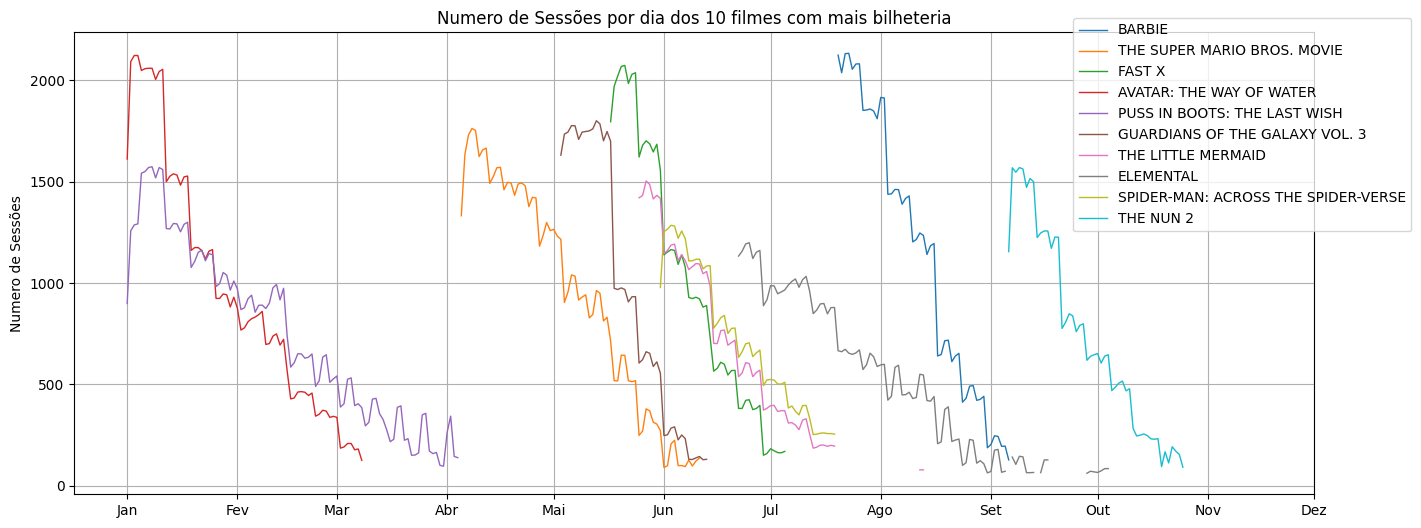

In [31]:
plt.figure(figsize=(16,6))
r = range(1,366)

for filmes,nome in filmes10_com_maior_bilheteria[["filme_id","titulo_original"]].values:
    plt.plot(r, sessoes_por_dia(filmes),label=nome,linewidth=1)

plt.legend(
    loc='center left',
    bbox_to_anchor=(0.8, 0.8),  # empurra para a direita
)
dias_inicio_mes = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
nomes_meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out","Nov", "Dez"]

plt.title("Numero de Sessões por dia dos 10 filmes com mais bilheteria")
plt.ylabel("Numero de Sessões")
plt.xticks(ticks=dias_inicio_mes, labels=nomes_meses)
plt.grid()
plt.show()

In [32]:
filmes10_com_maior_bilheteria

,filme_id,bilheteria_total,numero_sessoes,titulo_original
398,399,10238598,56364,BARBIE
323,324,6235953,64425,THE SUPER MARIO BROS. MOVIE
328,329,6132354,50614,FAST X
268,269,5631389,65808,AVATAR: THE WAY OF WATER
255,256,5358525,70676,PUSS IN BOOTS: THE LAST WISH
362,363,4211764,40509,GUARDIANS OF THE GALAXY VOL. 3
359,360,3987722,41205,THE LITTLE MERMAID
388,389,3985017,49623,ELEMENTAL
343,344,3328797,36391,SPIDER-MAN: ACROSS THE SPIDER-VERSE
454,455,2839181,36641,THE NUN 2


In [34]:
def questao_5(database):
    #carregamos as tabelas necessárias
    sessao = carrega_tabela(database, "sessao")
    filme = carrega_tabela(database, "filme")
    complexo = carrega_tabela(database, "complexo")
    sala = carrega_tabela(database, "sala")

    '''a partir daqui, renomearemos as colunas selecionadas das tabelas sala, complexo e filme 
    para que tenham o mesmo nome entre elas e as escolhidas da tabela sessao, a fim de poder fazer merge entre elas. '''
    #a partir da tabela sala, selecionamos as colunas id e from_complexo, renomeando-as para, respectivamente, sala_id e cidade_id
    sala_id__cidade__id = (
        sala[["id", "from_complexo"]]
        .rename(columns={"id":"sala_id","from_complexo":"cidade_id"})
        )
    
    #a partir da tabela complexo, selecionamos as colunas id e municipio, renomeando-as para, respectivamente, cidade_id e cidade
    cidade_id__cidade = (
        complexo[["id", "municipio"]]
        .rename(columns={"id":"cidade_id","municipio":"cidade"})
        )
    
    #a partir da tabela sessao, selecionamos as colunas sala_id, filme_id e publico
    #agrupamos esta última tabela por sala_id e filme_id semelhantes, somando o público total de cada sala para cada filme
    sala_id__filme_id__publico_total = (
        sessao[["filme_id","sala_id","publico"]]
        .groupby(["sala_id","filme_id"])
        .sum()
        .reset_index()
        )
    
    #a partir da tabela filme, selecionamos as colunas id, titulo_original e pais_origem, renomeando a primeira para filme_id
    filme_id__titulo_original__pais_origem = (
        filme[["id", "titulo_original", "pais_origem"]]
        .rename(columns={"id":"filme_id"})
        )
    
    #merges
    sala_id__filme_id__publico_total__titulo = (
        sala_id__filme_id__publico_total
        .merge(filme_id__titulo_original__pais_origem, how="left", on="filme_id")
        )
    
    sala_id__cidade_id__cidade = (
        sala_id__cidade__id
        .merge(cidade_id__cidade, how="left", on="cidade_id")
        )

    sala_id__titulo_original__publico_total__pais_origem__cidade = (
        sala_id__filme_id__publico_total__titulo[["sala_id","titulo_original","publico","pais_origem"]]
        .merge(sala_id__cidade_id__cidade[["sala_id","cidade"]], how="left", on="sala_id")
        )
    
    #agrupamos por cidade e pais_origem, somando o público total de cada cidade por país que lançou os filmes citados no database
    cidade__pais_origem__publico = (
        sala_id__titulo_original__publico_total__pais_origem__cidade[["cidade", "pais_origem","publico"]]
        .groupby(["cidade","pais_origem"])
        .sum("publico")
        .reset_index()
        )
    
    #da tabela criada imediatamente acima, criamos esta aqui, escolhendo apenas as linhas cujos públicos por cidade sejam referentes a filmes brasileiros
    #resetamos o index
    #renomeamos as colunas para os nomes pedidos pela questão
    cidade__bilheteria_br = (
        cidade__pais_origem__publico
        .loc[cidade__pais_origem__publico["pais_origem"] == "BRASIL"]
        [["cidade","publico"]]
        .reset_index(drop=True)
        .rename(columns={"cidade":"CIDADE","publico":"BILHETERIA_BR"})
        
        )
    
    #aqui, pelo mesmo processo, criamos uma tabela escolhendo as linhas cujos públicos por cidade sejam referentes a filmes estrangeiros
    cidade__bilheteria_estrangeira = (
        cidade__pais_origem__publico
        .loc[cidade__pais_origem__publico["pais_origem"] != "BRASIL"]
        [["cidade","publico"]]
        .groupby("cidade")
        .sum("publico")
        .reset_index()
        .rename(columns={"cidade":"CIDADE","publico":"BILHETERIA_ESTRANGEIRA"})
    )

    #merge das tabelas sobre bilheterias brasileira e estrangeira
    cidade__bilheteria_br__bilheteria_estrangeira = (
        cidade__bilheteria_br.merge(cidade__bilheteria_estrangeira, how="left", on="CIDADE")
    )

    cidade__bilheteria_br__bilheteria_estrangeira["BILHETERIA_BR"] = (
        cidade__bilheteria_br__bilheteria_estrangeira["BILHETERIA_BR"]
        .fillna(0) #preenche valores nulos com 0
        .astype("Int64") #converte para tipo long-int, que permite realizar cálculos com valores inteiros de maior tamanho que o suportado pelo tipo int32 ou int.
    )

    #retorna o DataFrame com a bilheteria brasileira em ordem decrescente e com o index reiniciado
    return cidade__bilheteria_br__bilheteria_estrangeira.sort_values(ascending=False, by="BILHETERIA_ESTRANGEIRA").reset_index(drop=True)
questao_5("bilheteria.db")

,CIDADE,BILHETERIA_BR,BILHETERIA_ESTRANGEIRA
0,SÃO PAULO,403251,12907219.0
1,RIO DE JANEIRO,546789,7949517.0
2,BRASÍLIA,80122,3192315.0
3,CURITIBA,46382,2918732.0
4,BELO HORIZONTE,98746,2910668.0
...,...,...,...
334,MOGI-GUACU,598,1373.0
335,JOÃO MONLEVADE,252,1200.0
336,CÓRREGO FUNDO,123,NaN
337,PAINS,72,NaN


In [37]:
def questao_5(database):
    #carregamos as tabelas necessárias
    sessao = carrega_tabela(database, "sessao")
    filme = carrega_tabela(database, "filme")
    complexo = carrega_tabela(database, "complexo")
    sala = carrega_tabela(database, "sala")

    '''a partir daqui, renomearemos as colunas selecionadas das tabelas sala, complexo e filme 
    para que tenham o mesmo nome entre elas e as escolhidas da tabela sessao, a fim de poder fazer merge entre elas. '''
    #a partir da tabela sala, selecionamos as colunas id e from_complexo, renomeando-as para, respectivamente, sala_id e cidade_id
    sala_id__cidade__id = (
        sala[["id", "from_complexo"]]
        .rename(columns={"id":"sala_id","from_complexo":"cidade_id"})
        )
    
    #a partir da tabela complexo, selecionamos as colunas id e municipio, renomeando-as para, respectivamente, cidade_id e cidade
    cidade_id__cidade = (
        complexo[["id", "municipio"]]
        .rename(columns={"id":"cidade_id","municipio":"cidade"})
        )
    
    #a partir da tabela sessao, selecionamos as colunas sala_id, filme_id e publico
    #agrupamos esta última tabela por sala_id e filme_id semelhantes, somando o público total de cada sala para cada filme
    sala_id__filme_id__publico_total = (
        sessao[["filme_id","sala_id","publico"]]
        .groupby(["sala_id","filme_id"])
        .sum()
        .reset_index()
        )
    
    #a partir da tabela filme, selecionamos as colunas id, titulo_original e pais_origem, renomeando a primeira para filme_id
    filme_id__titulo_original__pais_origem = (
        filme[["id", "titulo_original", "pais_origem"]]
        .rename(columns={"id":"filme_id"})
        )
    
    #merges
    sala_id__filme_id__publico_total__titulo = (
        sala_id__filme_id__publico_total
        .merge(filme_id__titulo_original__pais_origem, how="left", on="filme_id")
        )
    
    sala_id__cidade_id__cidade = (
        sala_id__cidade__id
        .merge(cidade_id__cidade, how="left", on="cidade_id")
        )

    sala_id__titulo_original__publico_total__pais_origem__cidade = (
        sala_id__filme_id__publico_total__titulo[["sala_id","titulo_original","publico","pais_origem"]]
        .merge(sala_id__cidade_id__cidade[["sala_id","cidade"]], how="left", on="sala_id")
        )
    
    #agrupamos por cidade e pais_origem, somando o público total de cada cidade por país que lançou os filmes citados no database
    cidade__pais_origem__publico = (
        sala_id__titulo_original__publico_total__pais_origem__cidade[["cidade", "pais_origem","publico"]]
        .groupby(["cidade","pais_origem"])
        .sum("publico")
        .reset_index()
        )
    
    #da tabela criada imediatamente acima, criamos esta aqui, escolhendo apenas as linhas cujos públicos por cidade sejam referentes a filmes brasileiros
    #resetamos o index
    #renomeamos as colunas para os nomes pedidos pela questão
    cidade__bilheteria_br = (
        cidade__pais_origem__publico
        .loc[cidade__pais_origem__publico["pais_origem"] == "BRASIL"]
        [["cidade","publico"]]
        .reset_index(drop=True)
        .rename(columns={"cidade":"CIDADE","publico":"BILHETERIA_BR"})
        
        )
    
    #aqui, pelo mesmo processo, criamos uma tabela escolhendo as linhas cujos públicos por cidade sejam referentes a filmes estrangeiros
    cidade__bilheteria_estrangeira = (
        cidade__pais_origem__publico
        .loc[cidade__pais_origem__publico["pais_origem"] != "BRASIL"]
        [["cidade","publico"]]
        .groupby("cidade")
        .sum("publico")
        .reset_index()
        .rename(columns={"cidade":"CIDADE","publico":"BILHETERIA_ESTRANGEIRA"})
    )

    #merge das tabelas sobre bilheterias brasileira e estrangeira
    cidade__bilheteria_br__bilheteria_estrangeira = (
        cidade__bilheteria_br.merge(cidade__bilheteria_estrangeira, how="right", on="CIDADE")
    )

    cidade__bilheteria_br__bilheteria_estrangeira["BILHETERIA_BR"] = (
        cidade__bilheteria_br__bilheteria_estrangeira["BILHETERIA_BR"]
        .fillna(0) #preenche valores nulos com 0
        .astype("Int64") #converte para tipo long-int, que permite realizar cálculos com valores inteiros de maior tamanho que o suportado pelo tipo int32 ou int.
    )

    #retorna o DataFrame com a bilheteria brasileira em ordem decrescente e com o index reiniciado
    return cidade__bilheteria_br__bilheteria_estrangeira.sort_values(ascending=True, by="BILHETERIA_BR").reset_index(drop=True)
questao_5("bilheteria.db").head(7)

,CIDADE,BILHETERIA_BR,BILHETERIA_ESTRANGEIRA
0,ASSIS,0,23569
1,CANOINHAS,0,19082
2,LINS,0,18654
3,MARATAÍZES,0,10691
4,JABOTICABAL,0,16460
5,ITAPEVA,0,19472
6,MONTENEGRO,76,19609


In [42]:
def questao_5(database):
    #carregamos as tabelas necessárias
    sessao = carrega_tabela(database, "sessao")
    filme = carrega_tabela(database, "filme")
    complexo = carrega_tabela(database, "complexo")
    sala = carrega_tabela(database, "sala")

    '''a partir daqui, renomearemos as colunas selecionadas das tabelas sala, complexo e filme 
    para que tenham o mesmo nome entre elas e as escolhidas da tabela sessao, a fim de poder fazer merge entre elas. '''
    #a partir da tabela sala, selecionamos as colunas id e from_complexo, renomeando-as para, respectivamente, sala_id e cidade_id
    sala_id__cidade__id = (
        sala[["id", "from_complexo"]]
        .rename(columns={"id":"sala_id","from_complexo":"cidade_id"})
        )
    
    #a partir da tabela complexo, selecionamos as colunas id e municipio, renomeando-as para, respectivamente, cidade_id e cidade
    cidade_id__cidade = (
        complexo[["id", "municipio"]]
        .rename(columns={"id":"cidade_id","municipio":"cidade"})
        )
    
    #a partir da tabela sessao, selecionamos as colunas sala_id, filme_id e publico
    #agrupamos esta última tabela por sala_id e filme_id semelhantes, somando o público total de cada sala para cada filme
    sala_id__filme_id__publico_total = (
        sessao[["filme_id","sala_id","publico"]]
        .groupby(["sala_id","filme_id"])
        .sum()
        .reset_index()
        )
    
    #a partir da tabela filme, selecionamos as colunas id, titulo_original e pais_origem, renomeando a primeira para filme_id
    filme_id__titulo_original__pais_origem = (
        filme[["id", "titulo_original", "pais_origem"]]
        .rename(columns={"id":"filme_id"})
        )
    
    #merges
    sala_id__filme_id__publico_total__titulo = (
        sala_id__filme_id__publico_total
        .merge(filme_id__titulo_original__pais_origem, how="left", on="filme_id")
        )
    
    sala_id__cidade_id__cidade = (
        sala_id__cidade__id
        .merge(cidade_id__cidade, how="left", on="cidade_id")
        )

    sala_id__titulo_original__publico_total__pais_origem__cidade = (
        sala_id__filme_id__publico_total__titulo[["sala_id","titulo_original","publico","pais_origem"]]
        .merge(sala_id__cidade_id__cidade[["sala_id","cidade"]], how="left", on="sala_id")
        )
    return sala_id__titulo_original__publico_total__pais_origem__cidade.loc[sala_id__titulo_original__publico_total__pais_origem__cidade["cidade"] == "ASSIS"]
questao_5("bilheteria.db")

,sala_id,titulo_original,publico,pais_origem,cidade
81190,5004202,PUSS IN BOOTS: THE LAST WISH,1578,ESTADOS UNIDOS,ASSIS
81191,5004202,M3GAN,423,ESTADOS UNIDOS,ASSIS
81192,5004202,JOHN WICK: CHAPTER 4,348,ESTADOS UNIDOS,ASSIS
81193,5004202,AVATAR: THE WAY OF WATER,1108,ESTADOS UNIDOS,ASSIS
81194,5004202,ANT-MAN AND THE WASP: QUANTUMANIA,556,ESTADOS UNIDOS,ASSIS
81195,5004202,EVIL DEAD RISE,213,ESTADOS UNIDOS,ASSIS
81196,5004202,SCREAM VI,621,ESTADOS UNIDOS,ASSIS
81197,5004202,THE POPE´S EXORCIST,197,ESTADOS UNIDOS,ASSIS
81198,5004202,THE SUPER MARIO BROS. MOVIE,2527,ESTADOS UNIDOS,ASSIS
81199,5004202,FAST X,2712,ESTADOS UNIDOS,ASSIS
